# Regression Analysis (I)

In this notebook, we see how regression analysis can help to **understand the data behavior**, to **predict data values** (continuous or dichotomous), and to **find important predictors** (sparse models).
We present different regression models: Simple linear regression, Multiple linear regression and Polynomial regression. 
We evaluate the results qualitatively by means of Seaborn visualization tools and quantitatively by means of Scikit-learn library, as well as other toolboxes.

We use different real data sets:
* Prediction of the Price of a New Housing Data Market
* Sea Ice Extent and Climate Change
* Diabetes Scikit-learn dataset
* Longley dataset of US macroeconomic data
* Advertising dataset

### Contents of the notebook:

- Regression
    - Simple Linear Regression
    - Multiple Linear Regression
    - Polynomial Regression
- OLS (Ordinary Least Squares)
- Fit evaluation (MSE, R^2)
- Prediction (Scikit-learn)
- Visualization (Seaborn lmplot)

## How to make predictions about real-world quantities.

+  How does sales volume change with changes in price? How is it affected by weather?
+  How does the amount of a drug absorbed vary with body weight of patient? Does it depend on blood pressure?
+  How many customers can I expect today?
+  At what time should I go home to avoid the traffic jam?
+  What is the chance of rain for next two Mondays? What is the expected temperature?

<center><img src="files/images/crystal_ball_s.jpg"></center>

### Example:
    
 
<center><img src="files/images/life-expectancy-vs-gdp-per-capita.png"></center>


You can find another interesting example [here](https://ourworldindata.org/grapher/life-expectancy-of-women-vs-life-expectancy-of-women?tab=chart&country=&region=World).


Before starting, we can define some settings for the notebook:

In [1]:
# Settings for the visualizations
import matplotlib.pylab as plt
%matplotlib inline 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

In [2]:
import numpy as np
import pandas as pd

In [3]:
seed = 12 # Let's make our predictions deterministic

### Notation

$x_i$ element of a vector, $\textbf{x}$ column vector, $\textbf{x'}$ (transpose of $\textbf{x}$) row vector, $X$ matrix.

### From Data to Models

All these questions have a common structure: we are asking about one variable $\textbf{y}$ (*response*) that can be expressed as a combination of one or more (independent) variables $\textbf{x}_i$ (commonly called *covariates* or *predictors* or *regressors*).

The role of regression is to build a model (formula) to predict the response from the covariates.

# Linear Regression Model



The simplest model we can think of is the **linear model**, where the response $\textbf{y}$ depends linearly from the predictors $\textbf{x}_i$:

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} + \epsilon $$ 

The $a_i$ are termed *parameters* of the model or *coefficients* and $\epsilon$ is called *error term*, *disturbance term*, or *noise* (in contrast with the "signal" provided by the rest of the model). This variable captures all other factors which influence the dependent variable $ \textbf{y}$ other than the predictors $ \textbf{x}$. 

This equation can be rewritten in a more compact (matricial) form as

$$ \textbf{y}  = X \textbf{w} + \epsilon $$

where $$ \textbf{y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right), 
 X = \left( \begin{array}{c} x_{11}  \dots x_{1m} \\ x_{21}  \dots x_{2m}\\ \vdots \\ x_{n1}  \dots x_{nm} \end{array} \right),  \textbf{w} = \left( \begin{array}{c} a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right) 
 \epsilon = \left( \begin{array}{c} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_m \end{array} \right) $$
 
 **Linear regression** is the technique for creating linear models.
 
### Simple Linear Regression

In the **simple** linear regression, with a single variable, we describe the relationship between the predictor and the response with a straight line. 

The model is:
$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 + \epsilon$$

The parameter $a_0$ is called the *constant term* or the *intercept*.

In the matricial form we add a constant term by changing to the matrix: $(\textbf{1},X).$


#### Example: 

Does the insurance price depend on the driving experience?

Given the following information, the monthly auto insurance prices ($\textbf{y}$) and driving experiences in years ($\textbf{x}_{1}$) of a set of n=8 subjects, we can build a linear model to answer this question.


<center><img src="files/images/data-insurance.png" width="500"></center>


<center><img src="files/images/price-insurance.png" width="500"></center>



We can also predict the monthly auto insurance price for a driver with 20 years of driving experience.



### Interpolation vs. extrapolation

In practice, when we do prediction for some value of x we haven’t seen before, we need to be very careful. Predicting $y$ for a value of $x$ that is within the interval of points that we saw in the original data (the data that we fit our model with) is called **interpolation**. Predicting y for a value of x that’s outside the range of values we actually saw for x in the original data is called **extrapolation**.
For real datasets, even if a linear fit seems appropriate, we need to be extremely careful about extrapolation, which can often lead to false predictions!


<center><img src="files/images/extrapolation.png"  width="500"></center>


### Multiple Regression
In Ordinary Least Squares Regression with a single variable we described the relationship between the predictor and the response with a straight line. This case is called *simple* linear regression. 

The simple linear regression can be extended to a higher number of variables. Having m preditor variables, we'll fit an m-dimensional hyperplane to our m predictors.

$$ \textbf{y} = a_1 \textbf{x}_1 + \dots + a_m \textbf{x}_m = X \textbf{w} $$


### Polynomial Regression

Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

This very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial. The higher the order of the polynomial the more "wigglier" functions you can fit. 

We can represent a curved relationship between our variables by introducing **polynomial** terms, as for example, a cubic model:


$$y_i \approx a_0 + a_1 x_i + a_2 x_i^2 + a_3 x_i^3$$



Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

Example:

<center><img src="files/images/overfitting.png" width = '700'></center>



## Estimators


Let's generate a set of data to illsutrate simple linear regression

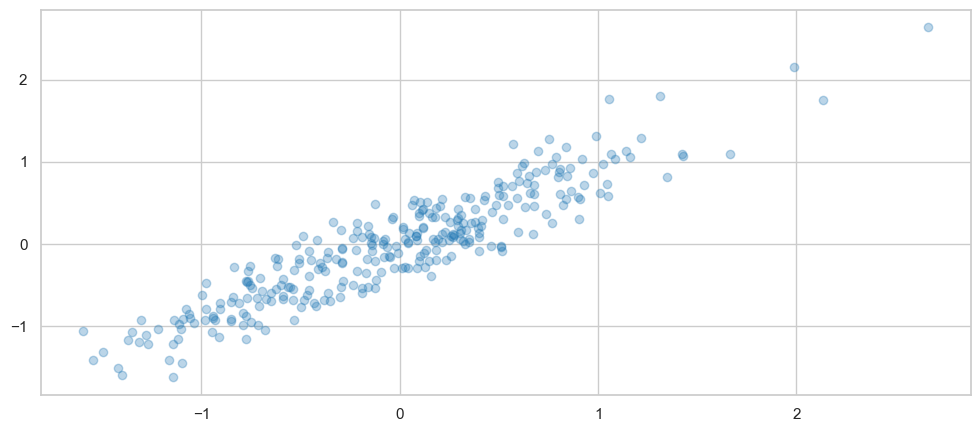

In [4]:
X1 = np.random.randn(300, 2)  # Random floats sampled from a univariate “normal” (Gaussian) distribution
A = np.array([[0.6, .4], [.4, 0.6]]) # Transformation matrix
X2 = np.dot(X1, A)

X = X2[:, 0]
y = X2[:, 1]

plt.plot(X, y, "o", alpha=0.3) # alpha, transparency value, between 0 (transparent) and 1 (opaque).

We can create a linear model to explain the data

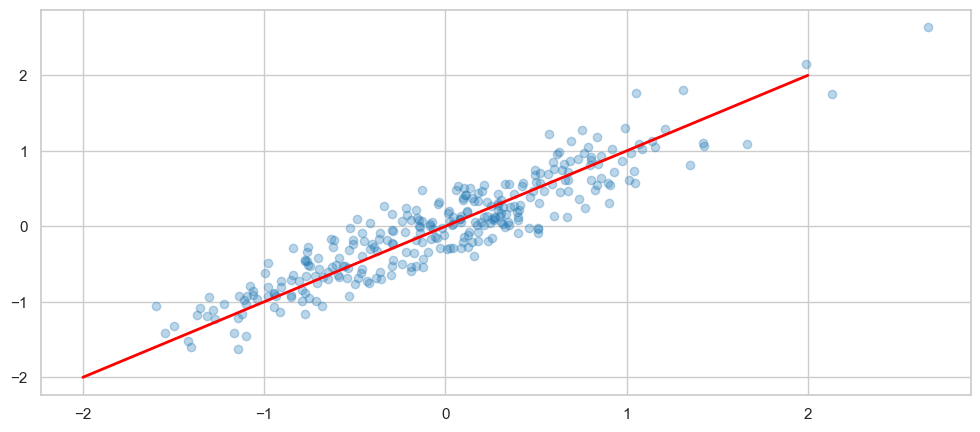

In [5]:
model=[0+1*x for x in np.arange(-2,3)] # np.arange returns evenly spaced values within a given interval.

plt.plot(X, y, "o", alpha=0.3);
plt.plot(np.arange(-2,3), model,'r'); 
plt.show()
# The red line gives the predicted values of this model

But there are other linear models. 


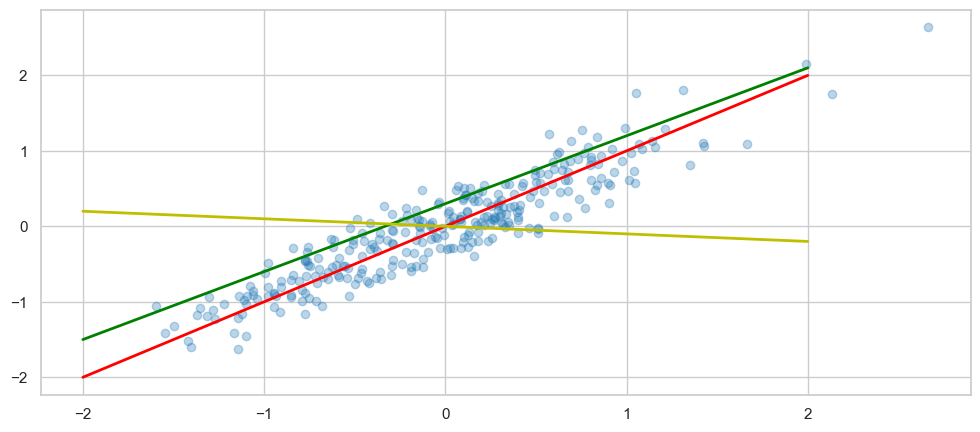

In [6]:
plt.plot(X, y, "o", alpha=0.3);
# We can use several parameters and we do not know which is the best model
model1=[0+1*x for x in np.arange(-2,3)]
model2=[0.3+0.9*x for x in np.arange(-2,3)]
model3=[0-0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1,'r')
plt.plot(np.arange(-2,3), model2,'g')
plt.plot(np.arange(-2,3), model3,'y')


#### Which is the best model for a set of samples?


### OLS (Ordinary Least Squares)

Consider the overdetermined system

$$\textbf{y} = a_0 + a_1 \textbf{x}$$

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the two \(a\)'s are chosen to minimize the sum of squared distances between the predicted values and the actual values.

Given the set of samples \((\textbf{x}, \textbf{y})\), the objective is to minimize:

$$
||a_0 + a_1 \textbf{x} - \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0 + a_1 x_j - y_j )^2,
$$

with respect to \(a_0, a_1\).

This expression is often called the **sum of squared errors of prediction (SSE)**.


#### DEMO
https://phet.colorado.edu/sims/html/least-squares-regression/latest/least-squares-regression_all.html

Play with this demo tool to understand what regression is doing

#### How to compute the OLS: Scipy.optimize

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153
-4.350013603887088 3.0000002915386412


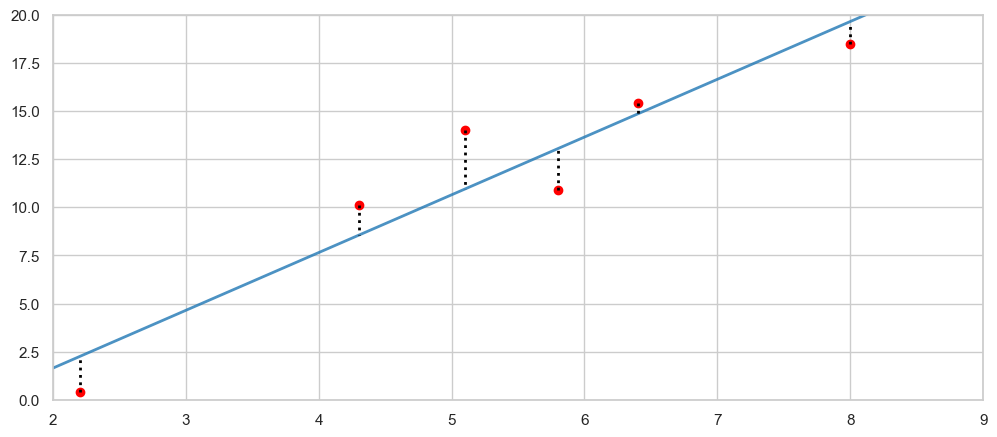

In [7]:
from scipy.optimize import fmin

x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
 
# Minimize the sum of squares using a lambda function

sse = lambda a, x, y: np.sum((a[0] + a[1]*x - y) ** 2) # Store the sum of squared differences function
# Lambda function is a small anonymous function. 
# It can take any number of arguments, but can only have one expression. 
# Syntax "lambda arguments : expression"

a0,a1 = fmin(sse, [0,1], args=(x,y)); # Minimize the sum of squared differences
# [0,1] is the initial guess for a[0] and a[1] in function sse.
## Try this with the below first:

#a0,a1 = 0, 1 # do you think this is the line that best represents these dots?

plt.plot(x, y, 'ro')
plt.plot([0,10], [a0, a0+a1*10], alpha=0.8) # Add the regression line, colored in blue
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, a0+a1*xi], "k:") # Add pointed black line to illustrate the errors
plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain
print(a0, a1)

The pointed black lines illustrate the vertical errors which are minimized.

**Note**: There are alternatives of errors-in-variables regression models as the **total least squares**.

### Other estimators

We can minimize other criteria, such as the sum of absolute differences between the predicted values and the actual values (**sum of absolute errors (SAE)**).

$$
\sum_{j=1}^n |a_0 + a_1 x_j - y_j|,
$$

with respect to \(a_0, a_1\).


<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**To complete**<p>
Try to fit a linear minimizing the SAE instead and make the same plot to visualize the results. What differences do you observe?

</div>

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77
0.0015717044449411344 2.3123174318112456


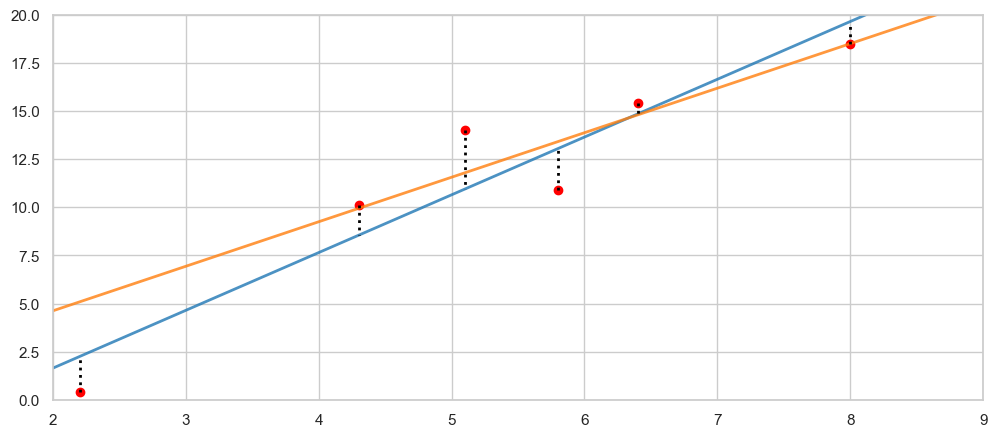

In [8]:
# Your code goes here

from scipy.optimize import fmin

x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
 
# Minimize the sum of squares using a lambda function

sse = lambda a, x, y: np.sum((a[0] + a[1]*x - y) ** 2) # Store the sum of squared differences function
sae = lambda a, x, y: np.sum(abs(a[0] + a[1]*x - y))
# Lambda function is a small anonymous function. 
# It can take any number of arguments, but can only have one expression. 
# Syntax "lambda arguments : expression"

b0,b1 = fmin(sae, [0,1], args=(x,y)); # Minimize the sum of squared differences
# [0,1] is the initial guess for b[0] and b[1] in function sse.

plt.plot(x, y, 'ro')
plt.plot([0,10], [a0, a0+a1*10], alpha=0.8) # Add the regression line, colored in blue
plt.plot([0,10], [b0, b0+b1*10], alpha=0.8) # Add the regression line, colored in orange
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, a0+a1*xi], "k:") # Add pointed black line to illustrate the errors
plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain
print(b0,b1)


As you can see, in this case, far values are penalized less.

**OLS is a popular approach for several reasons**

+ It is computationally cheap to calculate the coefficients. 
+ It is easier to interpret than more sophisticated models. In situations where the goal is understanding a simple model in detail, rather than estimating the response well, they can provide insight into what the model captures. 
+ Finally, in situations where there is a lot of noise, it may be hard to find the true functional form, so a constrained model can perform quite well compared to a complex model which is more affected by noise.

The resulting model is represented as follows:

$$\widehat{\textbf{y}} = \widehat{a}_0+\widehat{a}_1 \textbf{x}$$

Here the hats on the variables represent the fact that they are estimated from the data we have available.

# Python Implementation with Scikit-learn

### Train and Test Split

One of the key aspects of supervised machine learning is model evaluation and validation. When you evaluate the predictive performance of your model, it’s essential that the process be unbiased. 

You can’t evaluate the predictive performance of a model with the same data you used for training. You need evaluate the model with fresh data that hasn’t been seen by the model before. You can accomplish that by splitting your dataset before you use it.

Using train_test_split() from the data science library scikit-learn, you can split your dataset into subsets that minimize the potential for bias in your evaluation and validation process.

#### Implementing Train and test split

In [9]:
# Create some dummy data
X1 = np.random.randn(12, 2)  # Random floats sampled from a univariate “normal” (Gaussian) distribution
A = np.array([[0.6, .4], [.4, 0.6]]) # Transformation matrix
X2 = np.dot(X1, A)

X = X2[:, 0].reshape(-1,1) # X needs to be a 2D array as the input format for the model
y = X2[:, 1]

print('Size of X and y: {} {}'.format(X.shape, y.shape))
print(X)
print(y)

Size of X and y: (12, 1) (12,)
[[-0.73965803]
 [-0.84322813]
 [-0.49791783]
 [ 0.43638766]
 [-0.55691125]
 [ 0.31265655]
 [-0.77322169]
 [ 0.70596273]
 [-0.1801259 ]
 [ 0.04887701]
 [-0.12753203]
 [ 1.63283762]]
[-0.39218229 -0.6162521  -0.14482174  0.01451655  0.11704332  0.16582458
 -0.6587269   0.30496133 -0.19246641  0.19307906 -0.34171355  1.80635991]


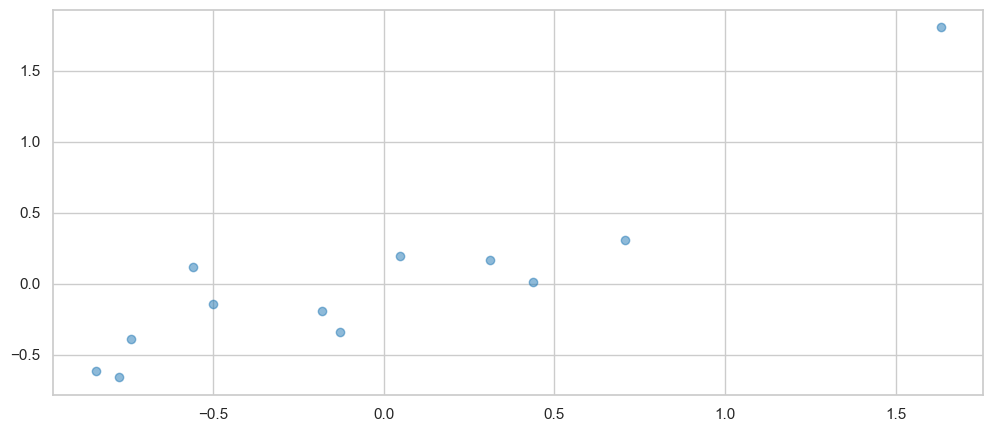

In [10]:
# Visualize our data
plt.plot(X, y, "o", alpha=0.5) # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.show()

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**To complete**<p>
Split in train and test sets and check sizes.

</div>

In [11]:
#!pip install scikit-learn
from sklearn.model_selection import train_test_split

# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(12, 1) (9, 1) (3, 1)
(12,) (9,) (3,)


## Prediction

Let's make predictions using **Scikit-learn**. 

Scikit-learn is a library that provides a variety of both supervised and unsupervised machine learning techniques. Scikit-learn provides an object-oriented interface centered around the concept of an Estimator. 

The <code>Estimator.fit</code> method sets the state of the estimator based on the *training data*. Usually, the data is comprised of a two-dimensional numpy array $X$ of shape <code>(n_samples, n_predictors)</code> that holds the so-called *feature matrix* and a one-dimensional numpy array $\textbf{y}$ that holds the *responses*. Some estimators allow the user to control the fitting behavior. 
Estimators that can generate predictions provide a ``Estimator.predict`` method. 
In the case of regression, ``Estimator.predict`` will return the predicted regression values, $\widehat{\textbf{y}}$. 

During the fitting process, the state of the estimator is stored in the instance attributes that have a trailing underscore (``'_'``). For example, the coefficients of a ``LinearRegression`` estimator are stored in the attribute ``coef_``. Let's see a toy example:

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**To complete**<p>
Create the Linear Regression estimator and perform the fitting

</div>

In [12]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

0.09856141023731552 [0.79500064]


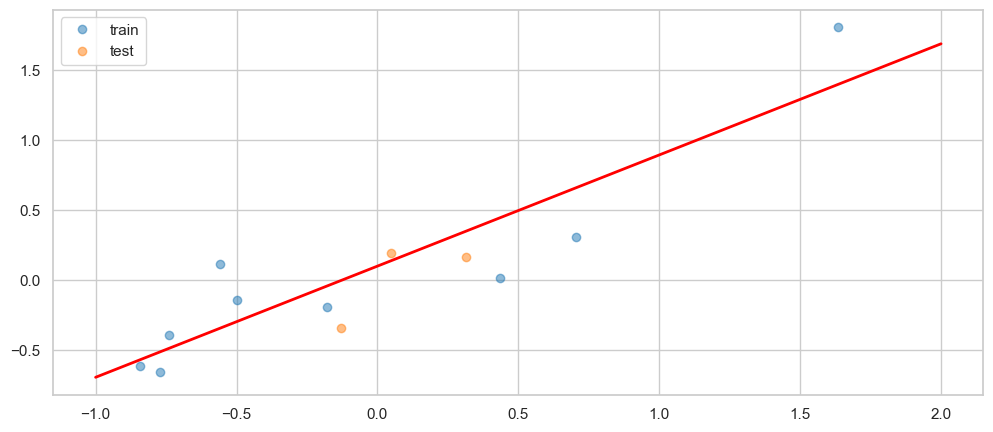

In [13]:
# Define xmin xmax for the model:
xmin, xmax = round(X.min()), round(X.max())

x_model = np.arange(xmin, xmax+1)
y_model=[lm.intercept_+lm.coef_*x for x in x_model] # np.arange returns evenly spaced values within a given interval.

plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(x_model, y_model,'r'); 

plt.legend()
plt.show()
# The red line gives the predicted values of this model

## Example 1: Boston Housing Data

The Boston housing data set provides records measurements of 13 attributes of housing markets around Boston, as well as the median price. We want to predict the price of a market given a set of attributes.



In [14]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [15]:
from pandas import read_csv
import pandas as pd
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_boston = read_csv('files/housing.csv', header=None, delimiter=r"\s+", names=column_names)

Boston dataset has 506 instances and 13 attributes. 
Let's see the content of the dataset which are the keys the attributes or features and the general description:

In [16]:
df_boston.head()
df_boston['MEDV'].mean()

22.532806324110677

We first consider the task of predicting **median house values** in the Boston area using as the predictor one of the attributes, for instance, **LSTAT**, defined as the "proportion of lower status of the population".

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**To complete**<p>

<ul>
<li>Visualize the data we want to fit</li>
<li>Split your data in a train and a test set</li>
<li>Fit a simple linear regression using variable LSTAT to predict Price</li>
<li>How good is the regression?</li>
</ul>


</div>

First, lets visualize the data we want to fit

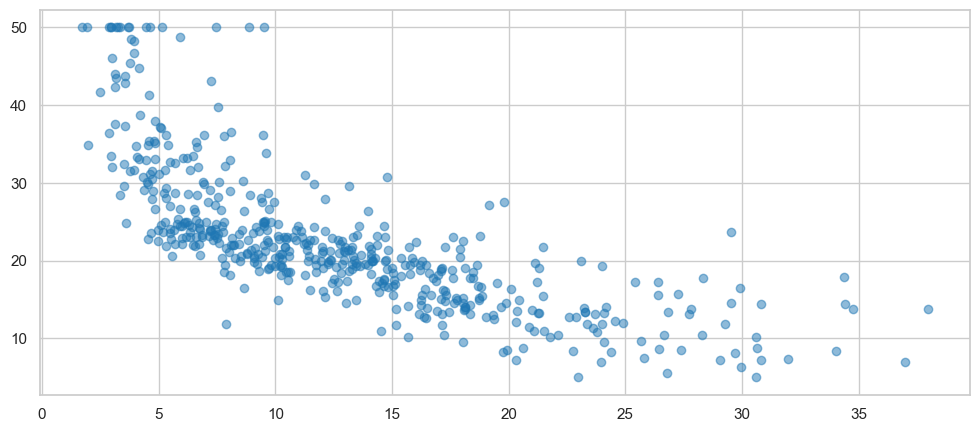

In [17]:
import matplotlib.pyplot as plt

# Your code goes here
X = df_boston.LSTAT.values.reshape(-1, 1)
y = df_boston.MEDV.values

plt.plot(X, y, "o", alpha=.5)

Split your data in a train and test sets

In [18]:
# Your code goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 1) (102, 1) (404,) (102,)


In [19]:
X_test[:10]

array([[29.68],
       [16.22],
       [ 7.79],
       [ 6.53],
       [13.44],
       [ 5.29],
       [34.77],
       [ 5.68],
       [ 3.95],
       [ 5.04]])

In [20]:
y_train[:10]

array([20.5, 22.3,  9.7, 13.5, 22.6, 25.1, 16.7, 17.6, 22. , 46.7])

Fit a simple linear regression: **LSTAT vs Price**

In [21]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coeficient and intercept of the regression
print(lm.intercept_, lm.coef_)

34.401810827023596 [-0.94502906]


Let's visualize the results

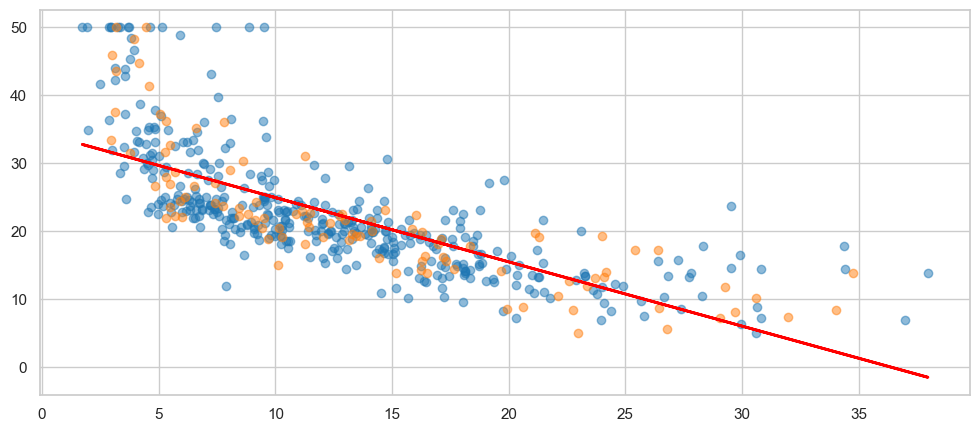

In [22]:
# Your code goes here
y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=.5)
plt.plot(X_test, y_test, "o", alpha=.5)
plt.plot(X_train, y_train_pred, "r")


## Evaluation

Evaluation

We can evaluate the model fitting by computing the mean squared error ($MSE$) and the coefficient of determination ($R^2$) of the model.

The coefficient $R^2$ is defined as:
$$R^2 = (1 - \textbf{u}/\textbf{v})$$
, where $\textbf{u}$ is the residual sum of squares: $$\textbf{u}=\sum (\textbf{y} - \widehat{\textbf{y}} )^2$$ where ${\textbf{y}}$ is the observed response and $\widehat{\textbf{y}}$ is the predicted response.

And $\textbf{v}$ is the total sum of squares: $$\textbf{v}=\sum (\textbf{y} - \bar{\textbf{y}})^2,$$ where $\bar{\textbf{y}}$ is the mean of the observed data.

The best possible score for $R^2$ is 1.0 (when $\textbf{u}=0$): lower values are worse. $R^2$ is 0.0 when $\textbf{u}=\textbf{v}$.


<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**To complete**<p>

Perform evaluation:
<ul>
<li>Using the model score</li>
<li>Using metrics from sklearn</li>

</ul>


</div>

#### Using the model score

The method score returns the coefficient of determination R^2 of the prediction.

In [23]:
# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse.
print('Score:')
print(lm.score(X_train, y_train), lm.score(X_test, y_test))

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print('MSE:')
print(mse_train, mse_test)

Score:
0.516417765047644 0.6346780431012051
MSE:
39.39232051602276 34.926439250816806


#### Using metrics from sklearn

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Make prediction
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Compute Score
print('Score:')
print(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

# Compute MSE for training and testing sets 
print('MSE:')
print(mean_squared_error(y_train_pred, y_train), mean_squared_error(y_test_pred, y_test))


Score:
0.516417765047644 0.6346780431012051
MSE:
39.39232051602276 34.926439250816806


#### Statistical evaluation with stats models

The ``statsmodels`` package provides several different classes that provide different options for linear regression. Getting started with linear regression is quite straightforward with the OLS module.

We can perform the regression of the predictor on the response, using the ``sm.OLS`` class and its initialization ``OLS(y, X)`` method. This method takes as an input two array-like objects: $X$ and $\textbf{y}$. In general, $X$ will either be a numpy array or a pandas data frame with shape ``(n, p)`` where $n$ is the number of data points and $p$ is the number of predictors. $\textbf{y}$ is either a one-dimensional numpy array or a pandas series of length $n$.

In [25]:
import statsmodels.api as sm
est = sm.OLS(y_train, X_train) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.468
Model:                            OLS   Adj. R-squared (uncentered):              0.467
Method:                 Least Squares   F-statistic:                              354.4
Date:                Mon, 12 Aug 2024   Prob (F-statistic):                    3.50e-57
Time:                        23:26:06   Log-Likelihood:                         -1736.8
No. Observations:                 404   AIC:                                      3476.
Df Residuals:                     403   BIC:                                      3480.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1802      0.063     18.826      0.000       1.057       1.303
==============================================================================
Omnibus:                        1.386   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                1.185
Skew:                           0.121   Prob(JB):                        0.553
Kurtosis:                       3.108   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Compare model performance

In [26]:
# Assuming your DataFrame is named 'df_boston'
X_boston = df_boston.drop('MEDV', axis=1)  # Select features (all columns except 'PRICE')
y_boston = df_boston['MEDV']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

n_features = len(X_train.columns)  # Get number of features from training data (more reliable)

scores = []

for i in range(n_features):
    # Select feature by name (assuming column names are informative)
    feat_name = X_train.columns[i]  # Use training data for column names
    feat1_train = X_train[feat_name].to_numpy().reshape(-1, 1)  # Reshape for single feature
    feat1_test = X_test[feat_name].to_numpy().reshape(-1, 1)  # Reshape for single feature

    # Train model
    regr_feat1 = LinearRegression()
    regr_feat1.fit(feat1_train, y_train.values.reshape(-1, 1))  # Reshape target variable

    # Predict (assuming y_test is a Series)
    y_train_pred = regr_feat1.predict(feat1_train)
    y_test_pred = regr_feat1.predict(feat1_test)

    # Evaluate model (using mean squared error)
    train_score = regr_feat1.score(feat1_train, y_train.values.reshape(-1, 1))  # Reshape target variable
    test_score = regr_feat1.score(feat1_test, y_test.values.reshape(-1, 1))  # Reshape target variable
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    scores.append([feat_name, train_score, test_score, mse_train, mse_test])

# Print or analyze scores as needed
print(pd.DataFrame(scores, columns=["Feature", "Train Score", "Test Score", "Train MSE", "Test MSE"]))

    Feature  Train Score  Test Score  Train MSE   Test MSE
0      CRIM     0.144469    0.158721  74.322872  61.694137
1        ZN     0.095792    0.258903  78.551585  54.347454
2     INDUS     0.221414    0.276408  67.638426  53.063745
3      CHAS     0.036344   -0.019099  83.716045  74.734405
4       NOX     0.172863    0.205205  71.856206  58.285326
5        RM     0.505066    0.370757  42.996616  46.144775
6       AGE     0.115747    0.240015  76.818058  55.732582
7       DIS     0.055279    0.073320  82.071168  67.956919
8       RAD     0.150131    0.104754  73.831048  65.651743
9       TAX     0.211411    0.241304  68.507389  55.638030
10  PTRATIO     0.241287    0.318508  65.911961  49.976378
11        B     0.115544    0.068405  76.835699  68.317412
12    LSTAT     0.542318    0.542918  39.760387  33.519549


In [27]:
df_scores = pd.DataFrame(scores, columns=["Feature", "train_score", "test_score","train_mse", "test_mse"], index=X_train.columns)
df_scores.sort_values(by="test_score", ascending=False, inplace=True)
df_scores

,Feature,train_score,test_score,train_mse,test_mse
LSTAT,LSTAT,0.542318,0.542918,39.760387,33.519549
RM,RM,0.505066,0.370757,42.996616,46.144775
PTRATIO,PTRATIO,0.241287,0.318508,65.911961,49.976378
INDUS,INDUS,0.221414,0.276408,67.638426,53.063745
ZN,ZN,0.095792,0.258903,78.551585,54.347454
TAX,TAX,0.211411,0.241304,68.507389,55.638030
AGE,AGE,0.115747,0.240015,76.818058,55.732582
NOX,NOX,0.172863,0.205205,71.856206,58.285326
CRIM,CRIM,0.144469,0.158721,74.322872,61.694137
RAD,RAD,0.150131,0.104754,73.831048,65.651743


<Axes: title={'center': 'MSE'}>

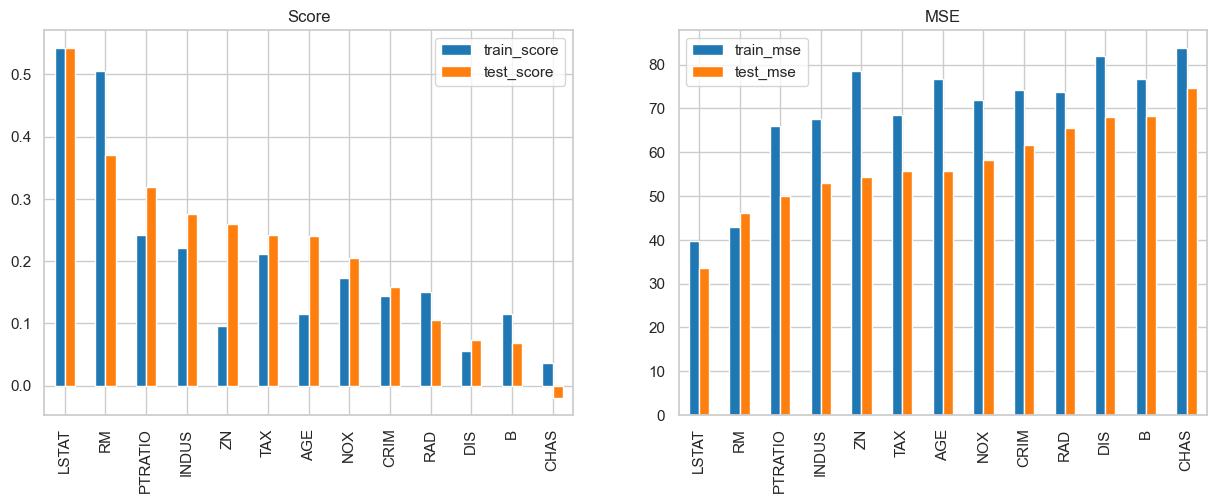

In [28]:
# Visualise train and test scores
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

df_scores[["train_score", "test_score"]].plot(kind="bar", ax=ax1, title='Score')
df_scores[["train_mse", "test_mse"]].plot(kind="bar", ax=ax2, title='MSE')

### Fitting a multiple linear model
It is possible as well to fit a multiple linear model, using all the variables:

![](https://miro.medium.com/v2/resize:fit:597/1*RqL8NLlCpcTIzBcsB-3e7A.png)

**how does this look in 4 dimensions? And in 11**

In [29]:
X_train.shape

(404, 13)

In [30]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

30.246750993923865 [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


In [31]:
# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
print("MSE Train: ", mse_train)

mse_test = np.mean((y_test_pred - y_test)**2)
print("MSE Test: ", mse_test)

MSE Train:  21.641412753226316
MSE Test:  24.291119474973442
